# 🦁 Project 1: Image Classification of 15 Animals

> A robust animal classifier trained using transfer learning with ResNet18.

### 🧠 Overview
- **Classes**: 15 animal species
- **Model**: ResNet18 with frozen encoder
- **Tools**: PyTorch, MLflow, Matplotlib
- **Accuracy**: 91.78% on test set

### 💻 Imports & Config 

In [25]:
# === Cell 1: Imports & Config ===
import os
import sys
import glob
import torch
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from IPython.display import Image as DisplayImage

from torchvision import transforms
import warnings
warnings.filterwarnings('ignore')

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src.config import DEVICE
from src.models.resnet import get_model
from src.dataloader import get_dataloaders

class_names = [
    "Bear", "Bird", "Cat", "Cow", "Deer", "Dog", "Dolphin",
    "Elephant", "Giraffe", "Horse", "Kangaroo", "Lion", "Panda",
    "Tiger", "Zebra"
]
def get_latest_model(path="../models", pattern="*.pt"):
    files = glob.glob(os.path.join(path, pattern))
    if not files:
        raise FileNotFoundError(f"No .pt files found in: {os.path.abspath(path)}")
    return max(files, key=os.path.getctime)

model = get_model()
model_path = get_latest_model()
model.load_state_dict(torch.load(model_path, map_location=DEVICE))
# model.to(DEVICE).eval()
# display(model)

<All keys matched successfully>

### 🔧 Architecture Summary

In [26]:
# === Cell 2: Architecture Summary ===
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 📈 Evaluation & Prediction

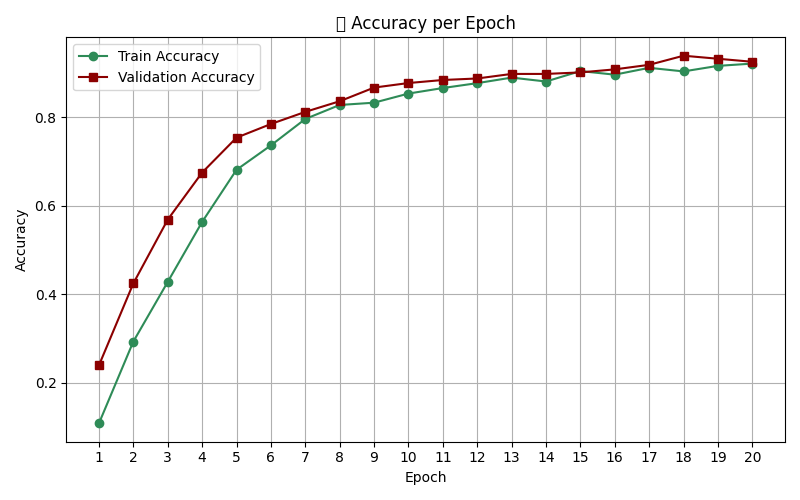

In [27]:
# === Cell 3: Show Accuracy Curve ===
from IPython.display import Image, display
display(Image(filename="../reports/final_accuracy_plot.png"))

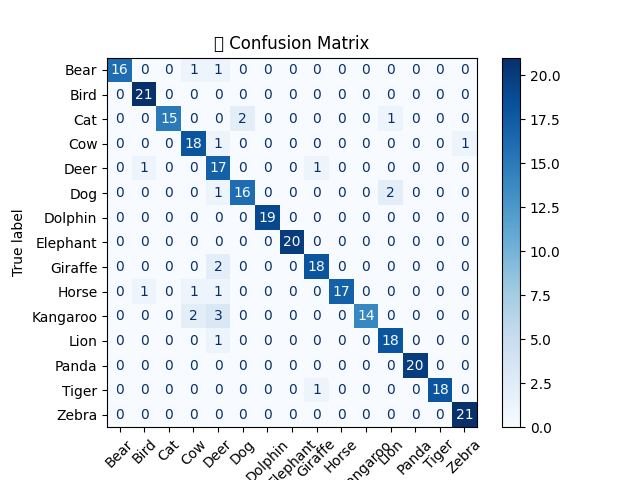

In [28]:
# === Cell 4: Show Confusion Matrix ===
display(Image(filename="../reports/confusion_matrix.png"))

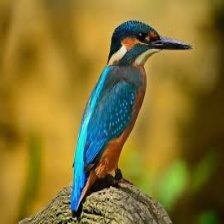

✅ Actual class   : Bird
🧠 Predicted class: Horse


In [29]:
# === Cell 5: Visualize Predictions ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# def predict_from_path(img_path):
#     img = Image.open(img_path).convert("RGB")
#     img_tensor = transform(img).unsqueeze(0).to(DEVICE)
#     with torch.no_grad():
#         pred = model(img_tensor).argmax(dim=1).item()
#     return class_names[pred]
def predict_from_path(img_path):
    img = PILImage.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        pred = model(img_tensor).argmax(dim=1).item()
    return class_names[pred]

# Example usage
test_img = r"..\data\raw\Bird\Bird_1_1.jpg"
prediction = predict_from_path(test_img)

display(DisplayImage(filename=test_img))

actual_class = os.path.basename(os.path.dirname(test_img))

print(f"✅ Actual class   : {actual_class}")
print(f"🧠 Predicted class: {prediction}")


## 💡 Highlights
- **Test Accuracy**: 91.78%
- **Best Model Saved**: `resnet18_20250702_155758.pt`
- **Tracked with**: MLflow
- **Visualized With**: Matplotlib & Scikit-learn



## 📦 Reproducibility
```bash
pip install -r requirements.txt
python train.py
```

## 📊 Raw Metrics Visualization

The following visualization aggregates all tracked metrics from MLflow logs across epochs—such as training accuracy, validation accuracy, loss curves, and other custom metrics. It offers a holistic overview of the model’s learning behavior throughout training:


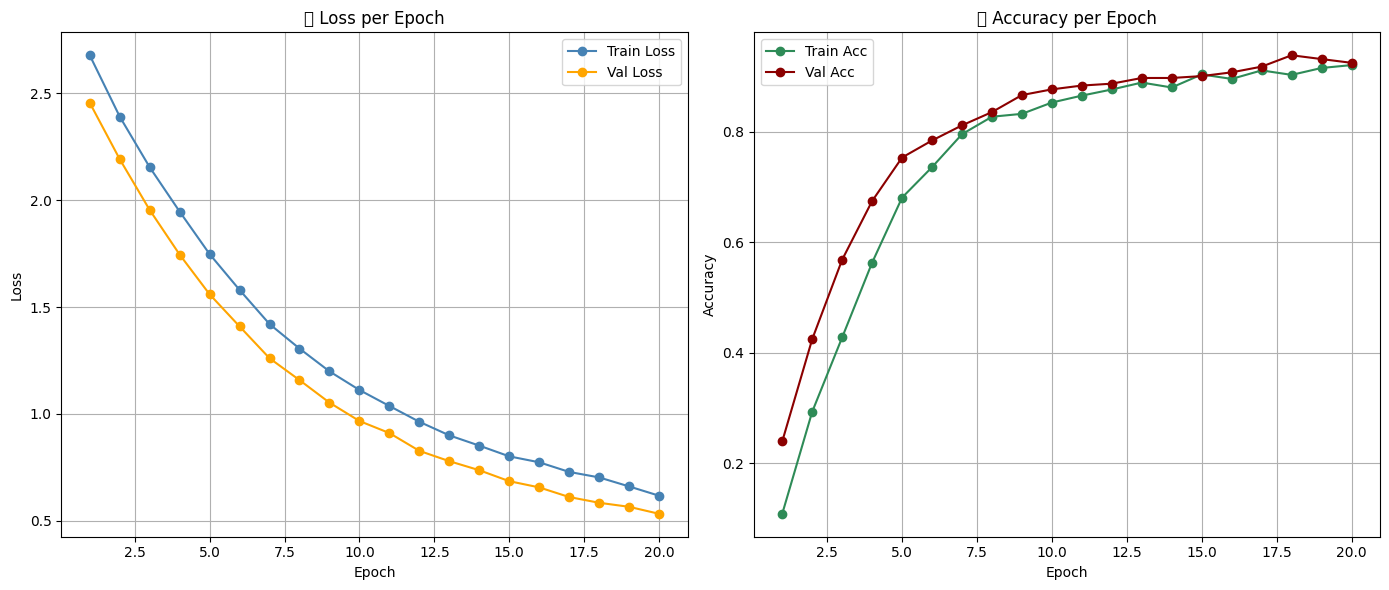

In [30]:
from IPython.display import Image, display

display(Image(filename="../reports/Visualize All Metrics from Raw Logs.png"))
